In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/customer_churn_large_dataset-csv.csv')

# 1. Display Top 5 Rows of The Dataset


In [ ]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# 2. Check Last Rows of The Dattaset

In [ ]:
data.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


# 3. Find Shape of the Dataset (Number of Rows and Number of Columns)

In [ ]:
data.shape

(100000, 9)

In [ ]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 100000
Number of Columns 9


#4. Get Information About the Dataset(like Total number of rows and columns, Datatypes of Column)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


#5. Check Null values In The Dataset

In [ ]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#6. Get overall Statics About the Dataset

In [ ]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#7. Dropping Irrelevant Features

In [ ]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
data = data.drop(['CustomerID', 'Name'], axis=1)

In [ ]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


#8. Encoding Categorical Data

In [ ]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [ ]:
#data = pd.get_dummies(data,drop_first=True)

In [ ]:
#data.head()

# Not Handling Imbalanced

In [ ]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

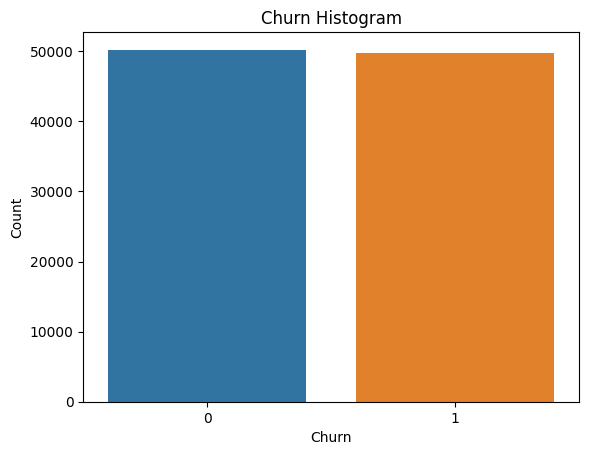

In [ ]:
sns.countplot(x="Churn", data= data)
plt.title("Churn Histogram")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
X = data.drop('Churn',axis=1)
y = data['Churn']

#9. Handling Imbalanced Data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

0    50221
1    50221
Name: Churn, dtype: int64

#10 Splitting The Dataset into Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res, test_size=0.20, random_state=42)

#11. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
90679,43,22,75.92,353,1,1,0,0,0
52212,45,20,57.41,374,0,1,0,0,0
9203,66,11,99.08,191,0,1,0,0,0
3942,44,21,34.31,173,1,0,1,0,0
31003,52,1,91.40,97,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6265,35,21,67.33,235,1,0,0,1,0
54886,56,13,85.40,347,1,0,0,0,0
76820,69,2,76.24,321,1,1,0,0,0
860,55,12,89.19,315,1,0,0,0,0


#12. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.5034596047588232

In [ ]:
accuracy_score(y_test,y_pred1)

0.5034596047588232

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.4964446551315478

In [ ]:
precision_score(y_test,y_pred1)

0.5039370078740157

In [ ]:
recall_score(y_test,y_pred1)

0.42075130574527925

In [ ]:
recall_score(y_test,y_pred1)

0.5281368065221714

In [ ]:
f1_score(y_test,y_pred1)

0.455474611286289

In [ ]:
f1_score(y_test,y_pred1)

0.5157531919025196

#13. SVC(Support Vector Classifier)

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.4996764398427

In [ ]:
precision_score(y_test,y_pred2)

0.5005195190737717

#14. KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.5007217880432078

In [ ]:
precision_score(y_test,y_pred3)

0.5014042126379138

#15. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.4996764398427

In [ ]:
precision_score(y_test,y_pred4)

0.5003496852832451

#16. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.49654039524117677

In [ ]:
precision_score(y_test,y_pred5)

0.49709784411276947

In [ ]:
final_data=pd.DataFrame({'Models' :['LR','SVC','KNN','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.503460
1,SVC,0.499676
2,KNN,0.500722
3,DT,0.499676
4,RF,0.496540


In [ ]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

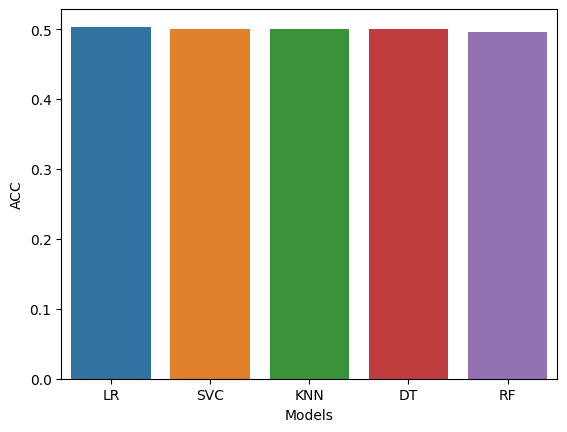

In [ ]:
sns.barplot(x= final_data.Models, y=final_data.ACC)

In [ ]:
final_data=pd.DataFrame({'Models' :['LR','SVC','KNN','DT','RF'],'PRE':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5)]})

In [ ]:
final_data

,Models,PRE
0,LR,0.503937
1,SVC,0.500520
2,KNN,0.501404
3,DT,0.500350
4,RF,0.497098


<Axes: xlabel='Models', ylabel='PRE'>

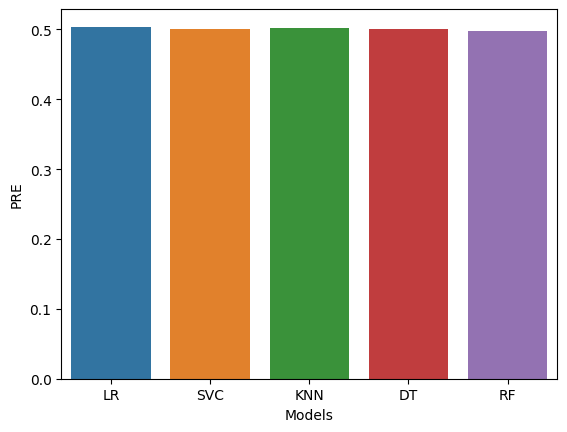

In [ ]:
sns.barplot(x= final_data.Models, y=final_data.PRE)

#18. Save The Model

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
log.fit(X_res,y_res)

LogisticRegression()

In [ ]:
import joblib

In [ ]:
joblib.dump(log, 'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
data.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [ ]:
model.predict([[43,6,86.72,390,1,0,1,0,0]])

array([0])

#GUI

In [ ]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
import matplotlib
matplotlib.use('Agg')

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Location_Houston=1
        Location_LosAngeles=0
        Location_Miami=0
        Location_NewYork=0
    elif p9 == 2:
        Location_Houston=0
        Location_LosAngeles=1
        Location_Miami=1
        Location_NewYork=1
    elif p9 == 3:
        Location_Houston=1
        Location_LosAngeles=0
        Location_Miami=0
        Location_NewYork=0
    p10=int(e10.get())
    model = joblib.load('churn_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,Location_LosAngeles,Location_Miami,Location_NewYork,p10]]))

    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)


master = Tk()
master.title("Churn Prediction Using Machine Learning")

label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Age").grid(row=1)
Label(master, text="Subscription_Length_Months").grid(row=2)
Label(master, text="Monthly_Bill").grid(row=3)
Label(master, text="Total_Usage_GB").grid(row=4)
Label(master, text="Churn").grid(row=5)
Label(master, text="Gender_Male").grid(row=6)
Label(master, text="Location_Houston").grid(row=7)
Label(master, text="Location_Los Angeles").grid(row=8)
Label(master, text="Location").grid(row=9)
#Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: ignored